In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xarray 
import matplotlib.patches as mpatches
import os


In [2]:
#Accessing all the nc files
path=[]

months=["03","04","05"]

#Storing the paths in a array
for i in range(1901,2023):
    for j in months:
        path.append(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\ERSST version 3B\ersst.v5.{i}{j}.nc")
    
    
#Accessing all the datasets and storing all data in all_data list
all_data=[]
for i in path:
    temp = xarray.open_dataset(i)
    all_data.append(temp)



In [3]:
def PlotMap(data,year=None):
    
    # Create a figure and axis for the plot
    fig, ax = plt.subplots(figsize=(16,8))
    
    # Create a colormap
    cmap = plt.get_cmap('rainbow')  # You can choose any other colormap you prefer

    # Determine the appropriate color limits based on your data
    vmin = data.min()  # Minimum value for the color scale
    vmax = data.max() # Maximum value for the color scale
    
    regions = {
        'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
        'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
        'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
        'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
        'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
        'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
        'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
        'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
        'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
        'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
        'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
        'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    
      }
    
    colors = ['red', 'blue', 'green', 'yellow', 'magenta', 'cyan', 
          'orange', 'purple', 'brown', 'pink', 'gray', 'olive']
    
    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        rect = mpatches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor=colors[i],facecolor='None')
        ax.add_patch(rect)
        i+=1
        
           
    # Plot the average yearly rainfall data using the colormap
    im = ax.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')

    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, label='Temperature')

    # Set axis labels
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'World Map {year}')
    
    #plt.savefig(f'Cluster {cluster}.png', dpi=100, bbox_inches='tight')


In [4]:
def getRegionalData(data):
    regions = {
    'Atlantic Nino': [[340//2, 360//2], [-5//2+45, 5//2+45]],
    'Bay of Bengal': [[80//2, 100//2], [6//2+45, 20//2+45]],
    'Zonal Mode': [[50//2, 70//2], [-10//2+45, 10//2+45]],
    'Nino3': [[210//2, 270//2], [-5//2+45, 5//2+45]],
    'Nino3.4': [[190//2, 240//2], [-5//2+45, 5//2+45]],
    'Nino 4': [[160//2, 210//2], [-5//2+45, 5//2+45]],
    'North Atlantic': [[300//2, 350//2], [30//2+45, 45//2+45]],
    'North Pacific 1': [[140//2, 180//2], [30//2+45, 65//2+45]],
    'North Pacific 2': [[200//2, 240//2], [30//2+45, 65//2+45]],
    'South China Sea': [[110//2, 120//2], [5//2+45, 15//2+45]],
    'Southern Indian Ocean': [[40//2, 100//2], [-5//2+45, 15//2+45]],
    'Western Indian Ocean': [[50//2, 65//2], [-5//2+45, 10//2+45]],
    }


    
    masked_data=np.full_like(data,fill_value=data)

    i=0
    for name, coords in regions.items():
        x1, x2 = coords[0]
        y1, y2 = coords[1]
        masked_data[y1:y2, x1:x2] = None
        i+=1
    masked_data=xarray.DataArray(masked_data,dims=('lat', 'lon'))

    return masked_data
    

In [5]:
monthly_to_yearly_all_map=[]

for i in range(0,len(all_data),3):    
    monthly_to_yearly_combined = xarray.concat(all_data[i:i+3], dim='time')
    monthly_to_yearly_all_map.append(monthly_to_yearly_combined['sst'].mean(dim='time'))

    

In [6]:
monthly_to_yearly_all_map[121]

<xarray.DataArray 'sst' (lev: 1, lat: 89, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998],
        [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998,
         -1.7999998, -1.7999998]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lev      (lev) float64 0.0
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0

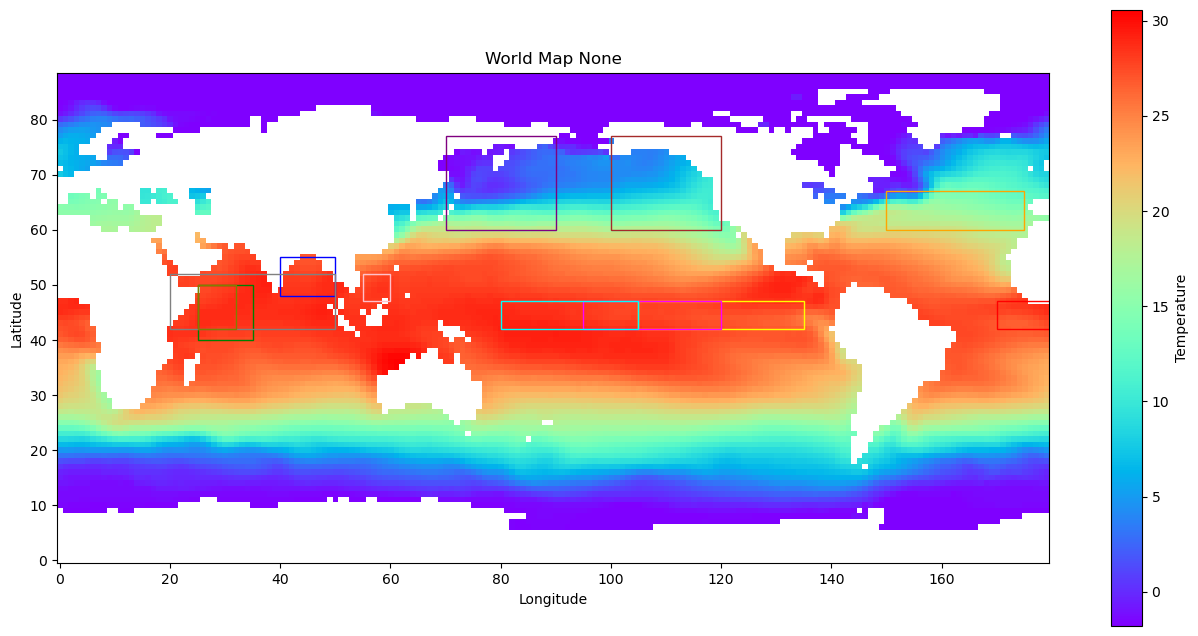

In [7]:
PlotMap(monthly_to_yearly_all_map[1][0])

In [8]:
all_regional_data=[]

for i in range(len(monthly_to_yearly_all_map)):
    all_regional_data.append(getRegionalData(monthly_to_yearly_all_map[i][0]))




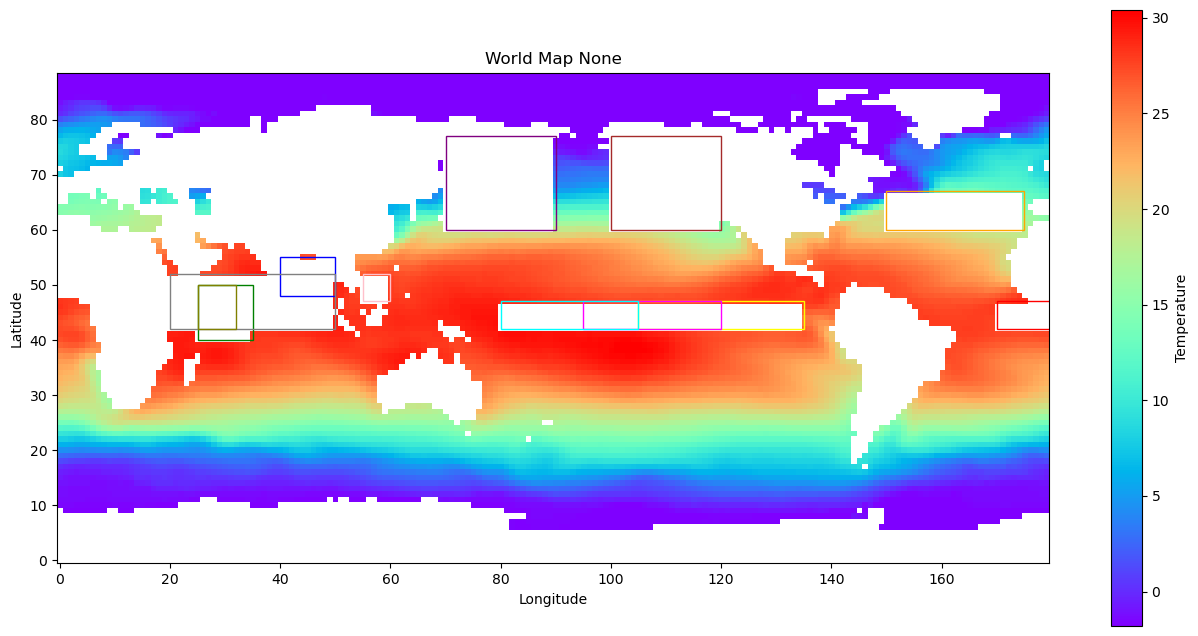

In [9]:
len(all_regional_data)
PlotMap(all_regional_data[0])

In [10]:
all_regional_data[0]

<xarray.DataArray (lat: 89, lon: 180)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998],
       [-1.7999998, -1.7999998, -1.7999998, ..., -1.7999998, -1.7999998,
        -1.7999998]], dtype=float32)
Dimensions without coordinates: lat, lon

In [11]:
yearly_combined_=xarray.concat(all_regional_data[0:110],dim='years')
yearly_mean=yearly_combined_.mean(dim='years')


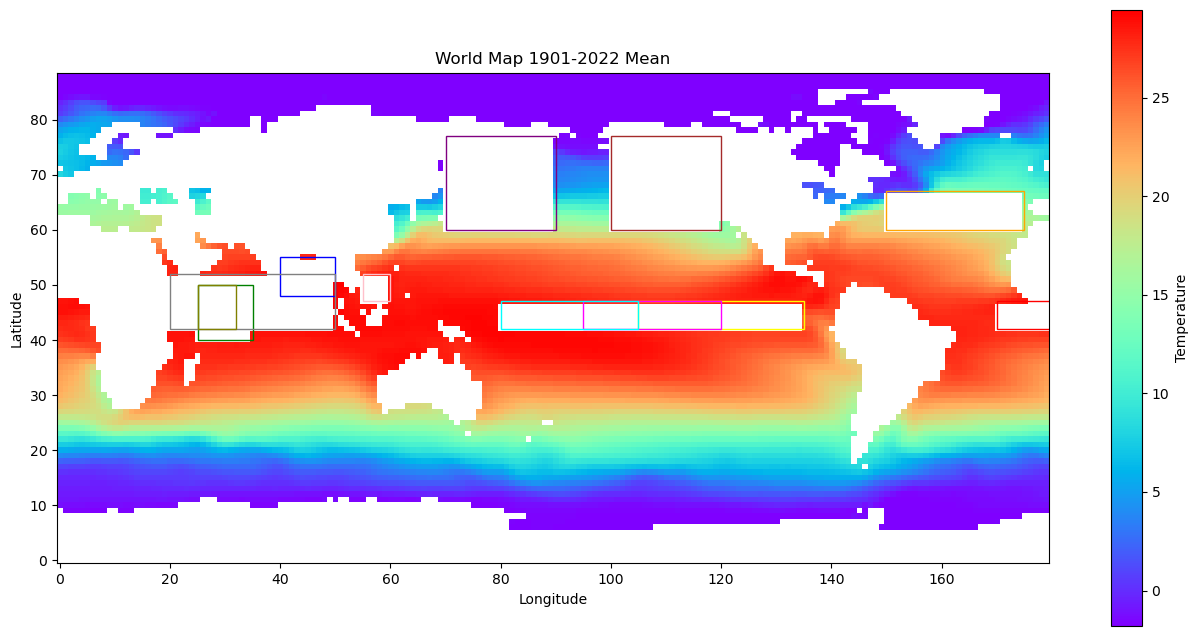

In [12]:
PlotMap(yearly_mean,"1901-2022 Mean")

In [13]:
yearly_ssta_data=[]


for i in range(len(all_regional_data)):
    yearly_ssta_data.append(all_regional_data[i]-yearly_mean)
    
   
                    

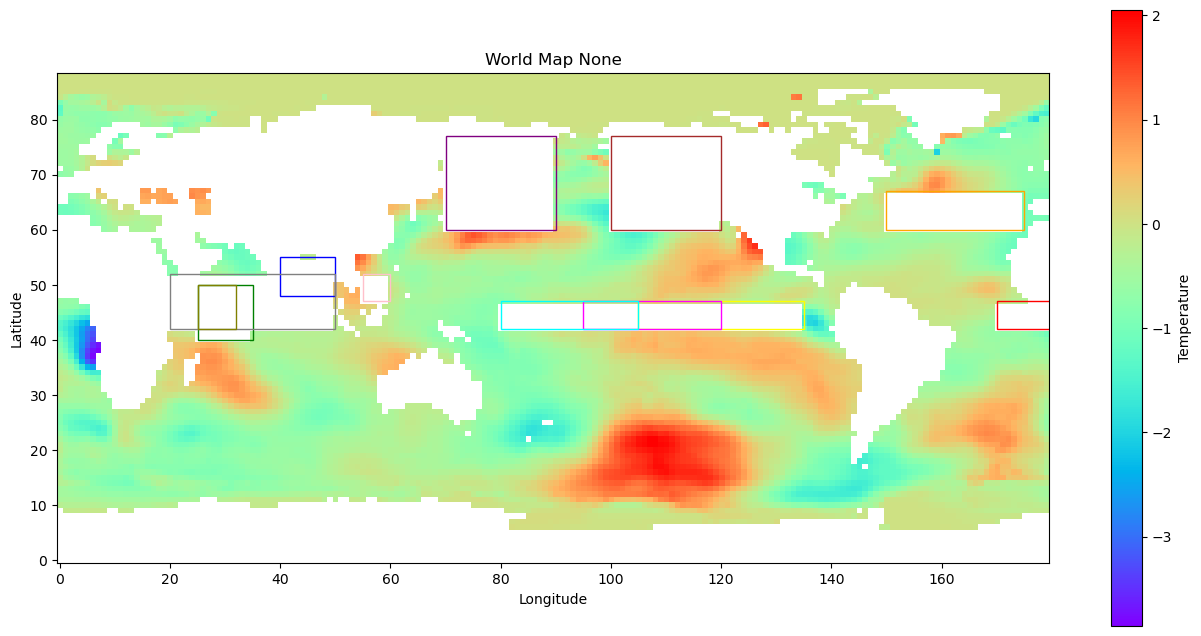

In [14]:
PlotMap(yearly_ssta_data[5])

In [15]:
year=1901
for i in range(len(yearly_ssta_data)):
    
    yearly_ssta_data[i].to_netcdf(fr"C:\Users\ratho\Desktop\Software Group Project - III\Climate Data Modelling\Data\SSTA Regional Data\No 12 Regions\ssta_{year}.nc") 
    year+=1

print(year)

2023


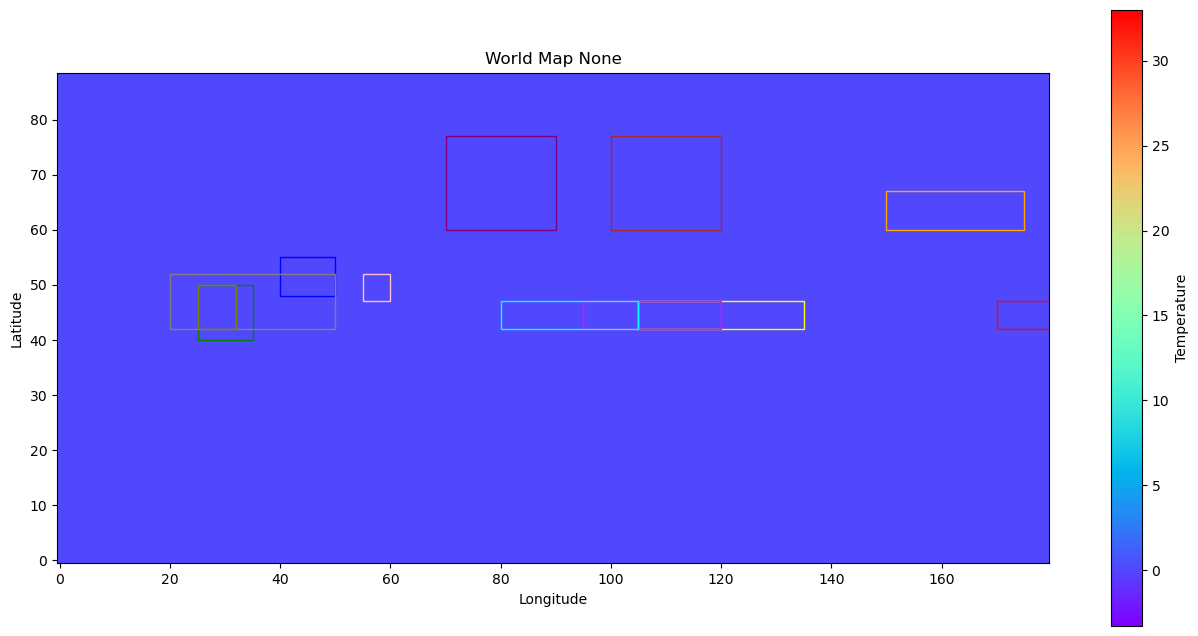

In [28]:
PlotMap(region1_yearly_ssta_data[20].combine_first(region2_yearly_ssta_data[20]))

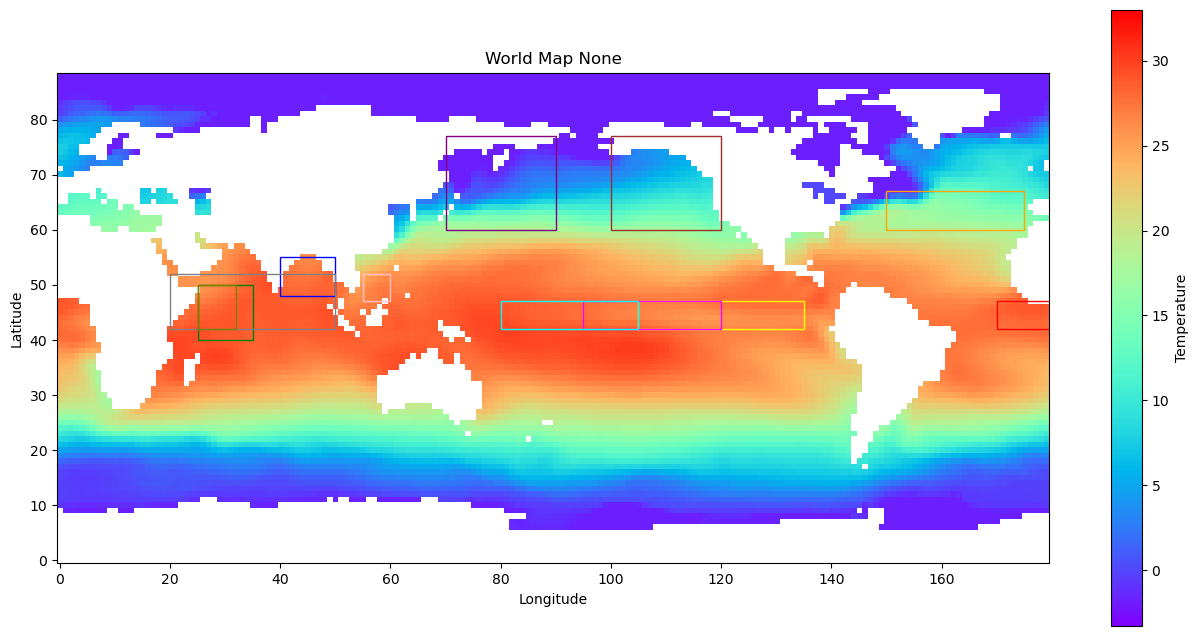

In [21]:
PlotMap(all_data[0]['sst'][0][0])